<a href="https://colab.research.google.com/github/Priyanka-Kugapriya/Clustering_notebook/blob/main/Scatter%20plot%20for%20chip%20on%20wafer%20csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

#changepath to CSV

df= pd.read_csv("/content/sample_data/CustomerW3_IT_6_Test_20210225182626301.csv",header=None)

In [2]:
df.columns = ['0','1','2', '3','4','5','6','7','8','9','10','11','12','13','14']

In [3]:
df.drop(['3','5', '7', '9', '11', '13','14'],axis='columns', inplace=True)

In [4]:
test = df.to_dict(orient="records")

In [5]:
test

[{'0': 0,
  '1': 0,
  '10': 0.0,
  '12': 0.0,
  '2': 331.4976807,
  '4': 366.4430847,
  '6': 0.0,
  '8': 0.0},
 {'0': 0,
  '1': 0,
  '10': 0.0,
  '12': 0.0,
  '2': 328.9136963,
  '4': 362.5173035,
  '6': 2372.15332,
  '8': 0.0},
 {'0': 0,
  '1': 0,
  '10': 0.0,
  '12': 0.0,
  '2': 332.4118958,
  '4': 0.0,
  '6': 0.0,
  '8': 0.0},
 {'0': 0,
  '1': 0,
  '10': 0.0,
  '12': 0.0,
  '2': 327.7376404,
  '4': 363.0177612,
  '6': 0.0,
  '8': 0.0},
 {'0': 0,
  '1': 0,
  '10': 0.0,
  '12': 0.0,
  '2': 329.4333191,
  '4': 0.0,
  '6': 0.0,
  '8': 0.0},
 {'0': 0,
  '1': 0,
  '10': 0.0,
  '12': 0.0,
  '2': 332.5012817,
  '4': 0.0,
  '6': 0.0,
  '8': 0.0},
 {'0': 0,
  '1': 0,
  '10': 0.0,
  '12': 0.0,
  '2': 330.5014343,
  '4': 362.8854065,
  '6': 0.0,
  '8': 0.0},
 {'0': 0,
  '1': 0,
  '10': 0.0,
  '12': 0.0,
  '2': 329.8582764,
  '4': 361.04843139999997,
  '6': 0.0,
  '8': 0.0},
 {'0': 0,
  '1': 0,
  '10': 0.0,
  '12': 0.0,
  '2': 329.4841919,
  '4': 362.7119751,
  '6': 0.0,
  '8': 0.0},
 {'0': 0,
 

In [6]:
frame_define = []
for i in test:
  key_arr = i.keys()
  for key in key_arr:
    if key not in ['0','1']:
      dc1 = {}
      dc1['X'] = i.get('0')
      dc1['Y'] = i.get('1')
      dc1['Column'] = key
      dc1['Value'] = i.get(key)
      frame_define.append(dc1)

In [7]:
df2 = pd.DataFrame(frame_define)

In [8]:
df3 = df2.loc[~((df2['Value'] == 0))]

In [11]:
df3

,X,Y,Column,Value
0,0,0,2,331.497681
1,0,0,4,366.443085
6,0,0,2,328.913696
7,0,0,4,362.517304
8,0,0,6,2372.153320
...,...,...,...,...
4069998,94,2293759,2,329.762146
4070004,94,2293759,2,333.106567
4070005,94,2293759,4,363.926758
4070010,94,2293759,2,328.430756


In [10]:
df3.dropna(subset = ["Value"], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
def  estimated_flayer_check(Value):
    if 139.366562	<= Value < 407.009552:   #range values defined using previously found 8 clusters 
        return 1
    elif 9.598228	<= Value < 132.062515:
        return 2
    elif 408.026917 <= Value < 616.477173:
        return 3
    elif 2016.426392 <= Value < 3635.074951:
        return 4
    elif 1204.358643 <= Value < 1593.281494:
        return 5
    elif 773.239075 <= Value < 997.561829:
        return 6
    elif 695.940857 <= Value < 749.443787:
        return 7
    elif 749.458435	<= Value < 773.138916:
        return 8
    elif 622.455261	<= Value < 692.868164:
        return 9
    else:
        return 10                                  #values which does not come under specified range

In [ ]:
# def  estimated_flayer_check(Value):
#     if 283.675293	<= Value < 377.307892:   #range values defined using previously found 8 clusters 
#         return 1
#     elif 9.598228	<= Value < 132.062515:
#         return 2
#     elif 408.026917 <= Value < 616.477173:
#         return 3
#     elif 2016.426392 <= Value < 2686.274170:
#         return 4
#     elif 1465.609985 <= Value < 1593.281494:
#         return 5
#     elif 773.239075 <= Value < 997.561829:
#         return 6
#     elif 695.940857 <= Value < 749.443787:
#         return 7
#     elif 749.458435	<= Value < 773.138916:
#         return 8
#     elif 622.455261	<= Value < 692.868164:
#         return 9
#     else:
#         return 10    

In [17]:
#checked on the original dataset without any reduction
df3['Estimated_layer'] = df3['Value'].apply(estimated_flayer_check)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



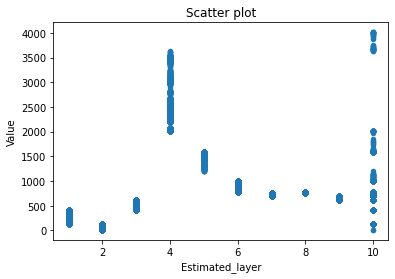

In [18]:
#original dataset df4 without any reduction
import matplotlib.pyplot as plot

df3.plot.scatter(x="Estimated_layer", y="Value", title= "Scatter plot");
plot.show(block=True);

In [19]:
print(df3['Estimated_layer'].value_counts())

1     678382
5     279458
4     209678
8     118383
7      96913
6      69595
3      22246
2      13385
9       2492
10      1223
Name: Estimated_layer, dtype: int64


In [20]:
df3_plot1= df3[df3['Estimated_layer']==1].copy()
df3_plot5= df3[df3['Estimated_layer']==5].copy()
df3_plot4= df3[df3['Estimated_layer']==4].copy()
df3_plot8= df3[df3['Estimated_layer']==8].copy()

In [21]:
df3_plot1_scatter= df3_plot1[df3_plot1['Estimated_layer']>0]
df3_plot1_scatter['num']=df3_plot1_scatter. index
df3_plot1_scatter=df3_plot1_scatter[df3_plot1_scatter['num']%20==0]

df3_plot5_scatter= df3_plot5[df3_plot5['Estimated_layer']>0]
df3_plot5_scatter['num']=df3_plot5_scatter. index
df3_plot5_scatter=df3_plot5_scatter[df3_plot5_scatter['num']%20==0]

df3_plot4_scatter= df3_plot4[df3_plot4['Estimated_layer']>0]
df3_plot4_scatter['num']=df3_plot4_scatter. index
df3_plot4_scatter=df3_plot4_scatter[df3_plot4_scatter['num']%20==0]

df3_plot8_scatter= df3_plot8[df3_plot8['Estimated_layer']>0]
df3_plot8_scatter['num']=df3_plot8_scatter. index
df3_plot8_scatter=df3_plot8_scatter[df3_plot8_scatter['num']%20==0]

x1=df3_plot1_scatter['X']
y1=df3_plot1_scatter['Y']
z1=df3_plot1_scatter['Value']

x2=df3_plot5_scatter['X']
y2=df3_plot5_scatter['Y']
z2=df3_plot5_scatter['Value']

x3=df3_plot4_scatter['X']
y3=df3_plot4_scatter['Y']
z3=df3_plot4_scatter['Value']

x4=df3_plot8_scatter['X']
y4=df3_plot8_scatter['Y']
z4=df3_plot8_scatter['Value']

fig = go.Figure(data=[go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    mode='markers',
    marker=dict(
        size=2,
        color=z1,                # set color to an array/list of desired values
        colorscale='algae',   # choose a colorscale
        opacity=0.8
    )
),go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        size=2,
        color=z2,                # set color to an array/list of desired values
        colorscale='blues',   # choose a colorscale
        opacity=0.8
    )
),go.Scatter3d(
    x=x3,
    y=y3,
    z=z3,
    mode='markers',
    marker=dict(
        size=2,
        color=z2,                # set color to an array/list of desired values
        colorscale='peach',   # choose a colorscale
        opacity=0.8
    )
),go.Scatter3d(
    x=x4,
    y=y4,
    z=z4,
    mode='markers',
    marker=dict(
        size=2,
        color=z2,                # set color to an array/list of desired values
        colorscale='purp',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [24]:
df3_plot1.describe()

,X,Y,Value,Estimated_layer
count,6.783820e+05,6.783820e+05,678382.000000,678382.0
mean,1.124559e+06,1.159019e+06,341.008046,1.0
std,1.049239e+06,7.335153e+05,22.291545,0.0
min,-3.000000e+00,-1.000000e+00,139.367188,1.0
25%,4.396600e+04,5.242880e+05,330.069214,1.0
50%,7.385400e+05,1.179647e+06,331.579224,1.0
75%,2.352755e+06,1.867775e+06,362.277267,1.0
max,2.490469e+06,2.293764e+06,407.005157,1.0


In [35]:
per1 = 678382 / 1478370 * 100
per1

45.88715950675406

In [23]:
df3_plot5.describe()

,X,Y,Value,Estimated_layer
count,2.794580e+05,2.794580e+05,279458.000000,279458.0
mean,1.318107e+06,1.046346e+06,1513.841048,5.0
std,4.250415e+05,4.125223e+05,35.430971,0.0
min,0.000000e+00,0.000000e+00,1204.358643,5.0
25%,9.700530e+05,7.208950e+05,1498.464478,5.0
50%,1.331786e+06,1.048575e+06,1510.802795,5.0
75%,1.670030e+06,1.376255e+06,1537.089203,5.0
max,2.490451e+06,2.293759e+06,1593.281494,5.0


In [36]:
per5 = 279458 / 1478370 * 100
per5

18.903116269945954

In [22]:
df3_plot4.describe()

,X,Y,Value,Estimated_layer
count,2.096780e+05,2.096780e+05,209678.000000,209678.0
mean,1.338160e+06,1.046254e+06,2349.295453,4.0
std,6.629155e+05,6.259767e+05,105.231821,0.0
min,-3.000000e+00,-1.000000e+00,2016.426392,4.0
25%,7.429910e+05,4.915200e+05,2292.412231,4.0
50%,1.422144e+06,1.015807e+06,2329.734863,4.0
75%,1.902096e+06,1.638399e+06,2403.864685,4.0
max,2.490469e+06,2.293764e+06,3635.074951,4.0


In [37]:
per4 = 209678 / 1478370 * 100
per4

14.183052956972883

In [25]:
df3_plot8.describe()

,X,Y,Value,Estimated_layer
count,1.183830e+05,1.183830e+05,118383.000000,118383.0
mean,1.299889e+06,1.043718e+06,760.785554,8.0
std,4.296469e+05,3.973493e+05,6.852163,0.0
min,1.000000e+01,6.553600e+04,749.458435,8.0
25%,9.393660e+05,7.208950e+05,754.564209,8.0
50%,1.306639e+06,1.048575e+06,761.091248,8.0
75%,1.655514e+06,1.343487e+06,766.550842,8.0
max,2.209170e+06,2.160182e+06,773.138428,8.0


In [38]:
per8 = 118383 / 1478370 * 100
per8

8.007670610199071

In [26]:
frames = [df3_plot1,df3_plot4,df3_plot5,df3_plot8]
df3_final_plot = pd.concat(frames, keys=['label1', 'label4', 'label5', 'label8'])
print(df3_final_plot)

                      X        Y Column       Value  Estimated_layer
label1 0              0        0      2  331.497681                1
       1              0        0      4  366.443085                1
       6              0        0      2  328.913696                1
       7              0        0      4  362.517304                1
       12             0        0      2  332.411896                1
...                 ...      ...    ...         ...              ...
label8 3311181  1770497  1835007      8  759.527710                8
       3313308  1890781  1835007      2  757.310181                8
       3348118  1844529  1867775     10  772.501465                8
       3422333  1791572  1900543     12  751.706116                8
       3832982       94  2160182      6  753.650635                8

[1285901 rows x 5 columns]


In [27]:
df3_final_plot

X        Y Column       Value  Estimated_layer
label1 0              0        0      2  331.497681                1
       1              0        0      4  366.443085                1
       6              0        0      2  328.913696                1
       7              0        0      4  362.517304                1
       12             0        0      2  332.411896                1
...                 ...      ...    ...         ...              ...
label8 3311181  1770497  1835007      8  759.527710                8
       3313308  1890781  1835007      2  757.310181                8
       3348118  1844529  1867775     10  772.501465                8
       3422333  1791572  1900543     12  751.706116                8
       3832982       94  2160182      6  753.650635                8

[1285901 rows x 5 columns]

In [29]:
df3_final_plot.to_csv("ChipOnWafer_final_df.csv")